Question:
You are provided with a dataset containing sales records of a retail store over the past year. The
dataset includes columns for date, product category, product ID, sales amount, and location.
Your task is to perform basic exploratory data analysis (EDA) to answer the following questions:
1. What was the total sales amount for each month?
2. Which product category generated the highest revenue?
3. Identify the top 5 products by sales amount.
4. Visualize the sales trends over the year.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('super_store_Data.csv',encoding='latin-1')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df[df.duplicated()].shape

(0, 21)

# Visualizations part

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


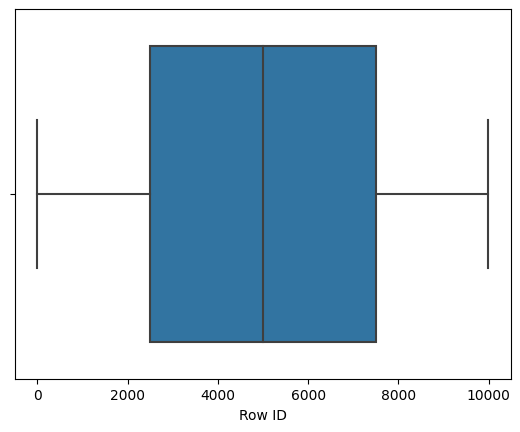

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


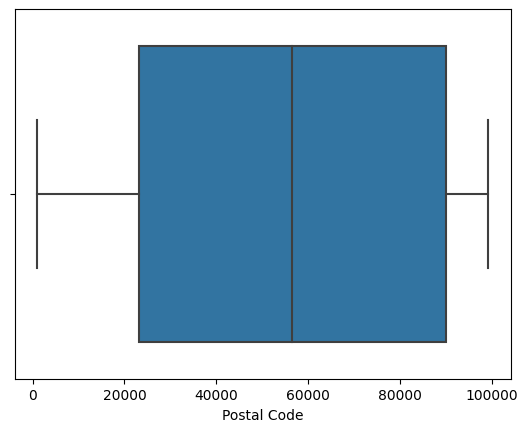

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


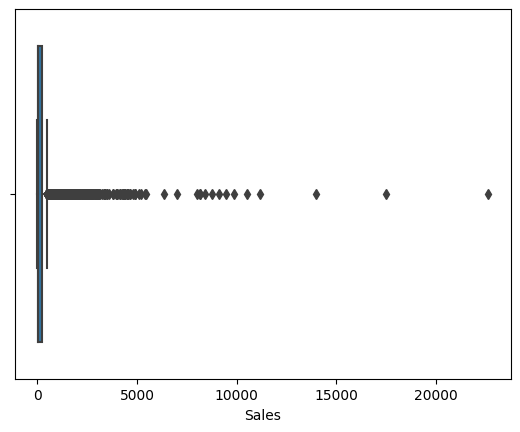

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


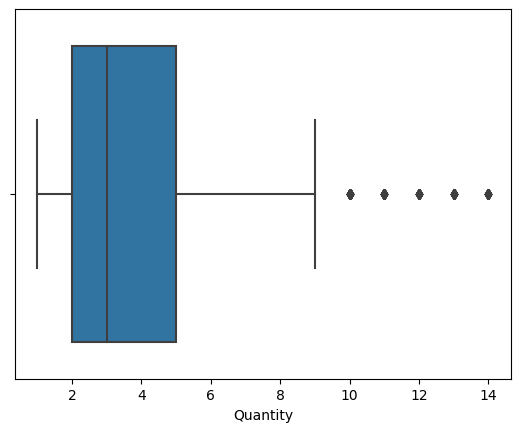

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


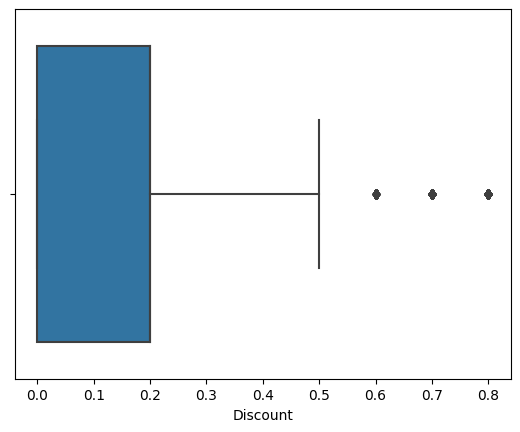

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


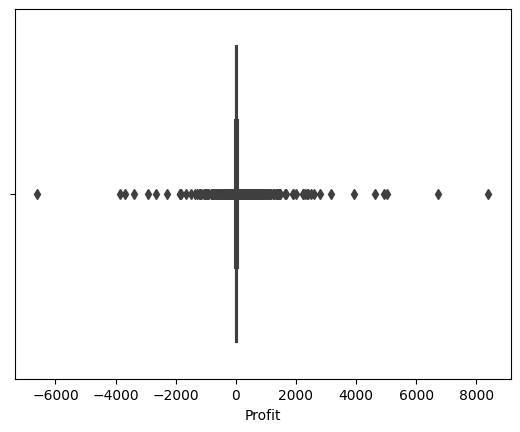

In [19]:
#Detection of Outliers

for i in df.select_dtypes(include='number').columns:
	sns.boxplot(data=df,x=i)
	plt.show()


In [20]:
# treatment of outliers


def wisker(cols):
	q1,q3=np.percentile(cols,[25,75])
	iqr=q3-q1
	lw=q1-1.5*iqr
	uw=q3+1.5*iqr
	return lw,uw
for i in ['Sales','Profit']:
	lw,uw=wisker(df[i])
	df[i]=np.where(df[i]<lw,lw,df[i])
	df[i]=np.where(df[i]>uw,uw,df[i])




C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


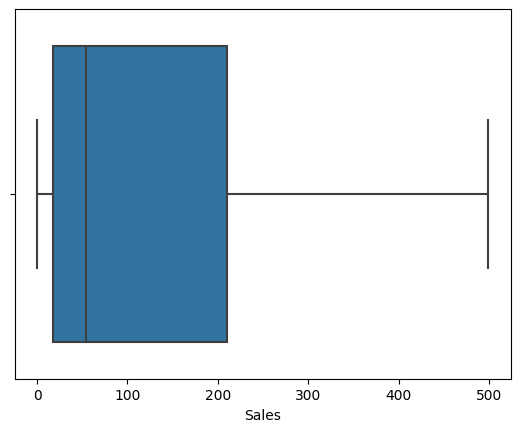

C:\Users\123\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


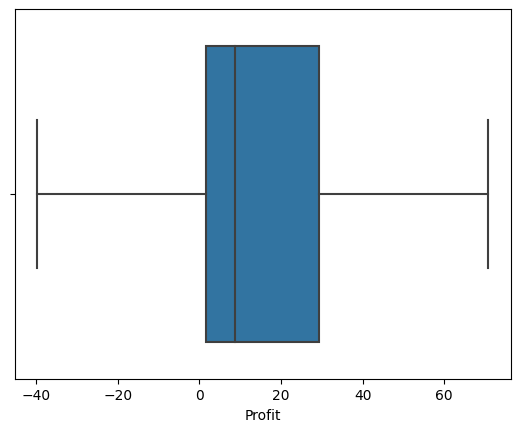

In [21]:
for i in ['Sales','Profit']:
	sns.boxplot(data=df,x=i)
	plt.show()

<AxesSubplot:>

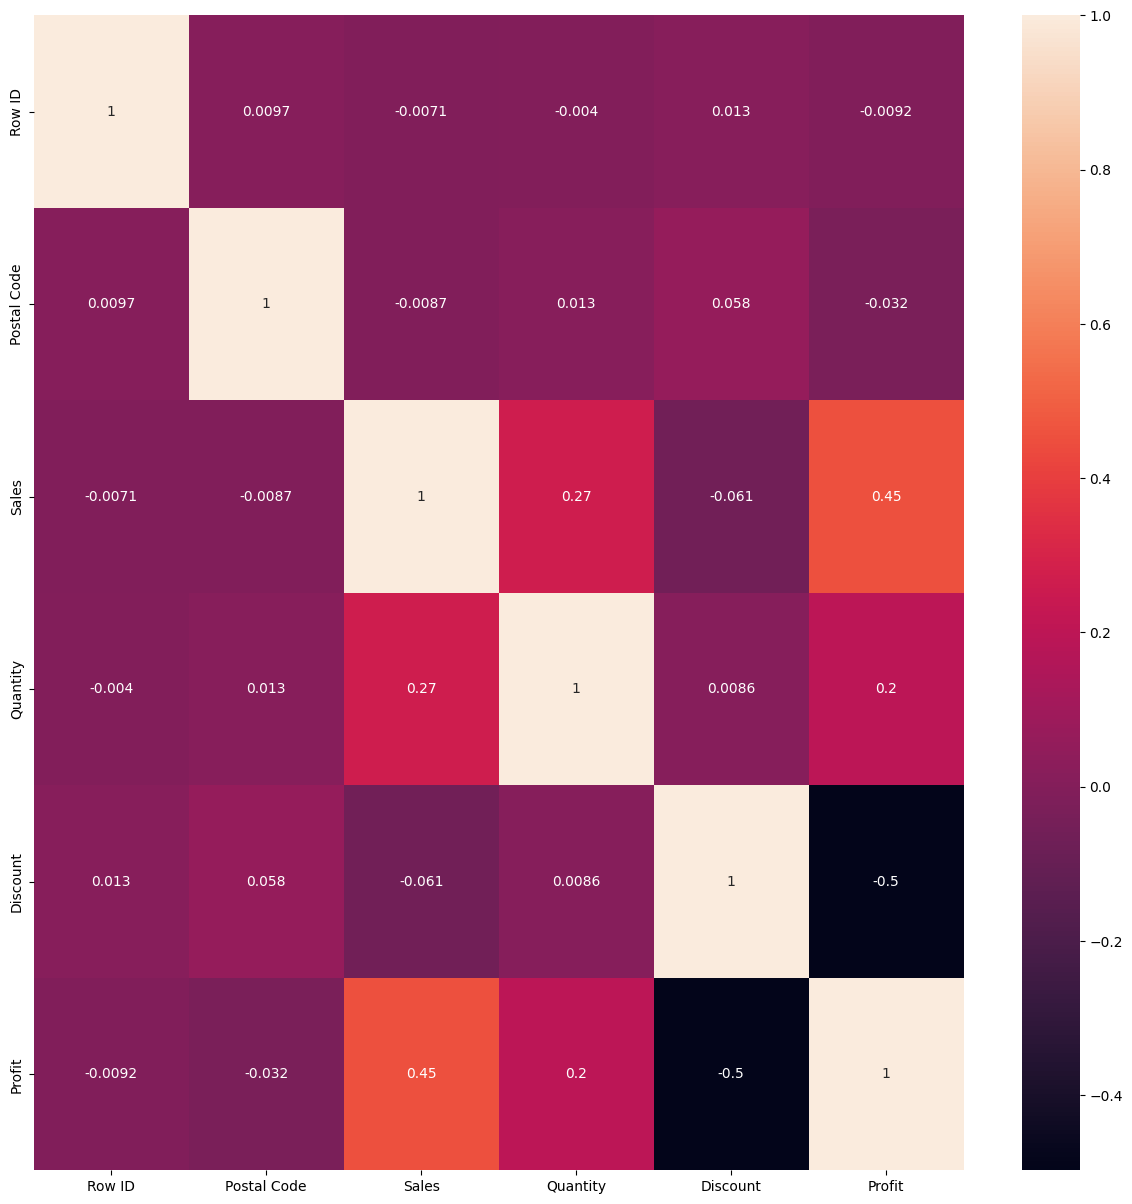

In [22]:
# Finding realtions beteen the variables

s=df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)


In [34]:

# 1. What was the total sales amount for each month?


df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)




df['year_month'] = df['Order Date'].dt.to_period('M')


monthly_sales = df.groupby('year_month')['Sales'].sum()
print(monthly_sales)




year_month
2014-01     9928.5250
2014-02     3762.6020
2014-03    22431.1360
2014-04    18905.1410
2014-05    16443.8750
2014-06    20987.8786
2014-07    20503.9470
2014-08    20937.5025
2014-09    37660.1288
2014-10    21678.9770
2014-11    49377.8297
2014-12    41732.6875
2015-01     8587.6140
2015-02     8556.0390
2015-03    20251.6116
2015-04    23645.5205
2015-05    19289.2240
2015-06    17328.3470
2015-07    21497.5670
2015-08    24527.1322
2015-09    41390.2400
2015-10    23380.3680
2015-11    49935.2103
2015-12    45433.0280
2016-01    12500.3970
2016-02    12644.7600
2016-03    27136.6520
2016-04    21757.4320
2016-05    28843.7000
2016-06    27342.3100
2016-07    27737.7620
2016-08    22220.1078
2016-09    48689.7435
2016-10    25355.8050
2016-11    50581.4540
2016-12    57333.6540
2017-01    20851.6730
2017-02    15459.7194
2017-03    33439.8708
2017-04    23274.3286
2017-05    32361.6554
2017-06    35819.8292
2017-07    32200.8730
2017-08    33589.9820
2017-09    58617.7020

In [38]:
#Which product category generated the highest revenue?



category_sales = df.groupby('Category')['Sales'].sum().reset_index()


top_cat = category_sales.loc[category_sales['Sales'].idxmax()]

print("product categeory that has more revenue is",top_cat['Category'])



product categeory that has more revenue is Office Supplies


In [40]:
# 3. Identify the top 5 products by sales amount.


product_sales = df.groupby('Product ID')['Sales'].sum().reset_index()

#Top-5
top_products = product_sales.nlargest(5, 'Sales')
print(top_products)


           Product ID     Sales
1517  TEC-AC-10002049  6901.716
121   FUR-CH-10004287  6038.860
1400  OFF-ST-10003716  5619.356
355   FUR-TA-10003473  5591.108
55    FUR-CH-10000454  5539.484
